In [1]:
#part 1
# define a function calculating gini impurity
def calcGini(count_class_a, count_class_b):
    count_sum = count_class_a + count_class_b
    if count_sum == 0:
        return 1
    prob_class_a = count_class_a / count_sum
    prob_class_b = count_class_b / count_sum
    gini = 1 - (prob_class_a ** 2 + prob_class_b ** 2)
    return gini

In [2]:
# define a function calculating entropy
import math
def calcEntropy(count_class_a, count_class_b):
    if count_class_a != 0  and count_class_b != 0:
        count_sum = count_class_a + count_class_b
        prob_class_a = count_class_a / count_sum
        prob_class_b = count_class_b / count_sum
        entropy = -prob_class_a * math.log2(prob_class_a) - prob_class_b * math.log2(prob_class_b)
    else:
        entropy = 0
    return entropy

In [3]:
# define a function calculating weighted sum of values
def weightedSum(value_lists, counts_lists):
    
    counts_probs = []
    sum_counts = 0
    for count in counts_lists:
        #sum of the counts_lists
        sum_counts += count 
    for every_count in counts_lists:
        # weight of each value in value lists
        counts_prob = every_count / sum_counts
        counts_probs.append(counts_prob)
    # build a weightsum list 
    weightedsum_list = []
    for i in range(0, len(value_lists)):
        weighted_each = value_lists[i] * counts_lists[i]
        weightedsum_list.append(weighted_each)
    # calculate weighted sum of values
    weighted_sums = 0
    for each_sum in weightedsum_list:
        weighted_sums += each_sum
    return weighted_sums

In [4]:
# verify functions
# load the toy data
import pandas as pd
toy_data = pd.read_csv('toyData.csv')
print(toy_data)
# verify calcGini function
# calculate gini impurity of column Variable A
gini_impurity_a = calcGini(6,4)
print("gini impurity of column one: " , gini_impurity_a)
# calculate gini impurity of column Variable B
gini_impurity_b = calcGini(6,4)
print("gini impurity of column two: " , gini_impurity_b)
# calculate gini impurity of column Variable C
gini_impurity_c = calcGini(7,3)
print("gini impurity of column three: " , gini_impurity_c)
# From the results above, we can see that the calcGini function gives the right answers.
# According to the formula of Gini impurity, we can caculate the gini impurity of each column mannually.
# gini_a = 1 - (6/10)^2 - (4/10)^2 = 0.48
# gini_b = 1 - (6/10)^2 - (4/10)^2 = 0.48
# gini_c = 1 - (7/10)^2 - (3/10)^2 = 0.42000000000000004

# verify calcEntropy function
# calculate entropy of column Variable A
entropy_a = calcEntropy(6,4)
print("entropy of column one: " , entropy_a)
# calculate entropy of column Variable B
entropy_b = calcEntropy(6,4)
print("entropy of column two: " , entropy_b)
# calculate entropy of column Variable C
entropy_c = calcEntropy(7,3)
print("entropy of column three: " , entropy_c)

# From the results above, we can see that the calcEntropy function gives the right answers.
# According to the formula of entropy, we can caculate the entropy of each column mannually.
# entropy_a = - (6/10) * log2(6/10) - (4/10)* log2(4/10) = 0.9709505944546686
# entropy_b = - (6/10) * log2(6/10) - (4/10)* log2(4/10) = 0.9709505944546686
# entropy_c = - (7/10) * log2(7/10) - (3/10)* log2(3/10) = 0.8812908992306927

  Variable A Variable B Variable C Output
0        Yes         On       High    Red
1         No        Off        Low   Blue
2        Yes         On       High    Red
3        Yes        Off       High    Red
4         No         On       High   Blue
5        Yes         On        Low   Blue
6         No        Off       High   Blue
7         No         On       High   Blue
8        Yes         On        Low   Blue
9        Yes        Off       High    Red
gini impurity of column one:  0.48
gini impurity of column two:  0.48
gini impurity of column three:  0.42000000000000004
entropy of column one:  0.9709505944546686
entropy of column two:  0.9709505944546686
entropy of column three:  0.8812908992306927


In [5]:
# Part 2
# 5
# Import Boston data
import pandas as pd
from sklearn.datasets import load_boston
boston_data = load_boston()
df_boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df_boston['TARGET'] = boston_data.target
df_boston.head()
# create a list to store the boolean-featured values
highValue_lists = []
targets_list = df_boston["TARGET"].tolist()
for target in targets_list:
    if target > 35:
        highValue_lists.append(1)
    else:
        highValue_lists.append(0)
# add a new column called highPriced
df_boston["highPriced"] = highValue_lists
df_boston.head()

# Interesting features of the values in highPriced column
# There are two classes in this column, and 0 and 1 are binary values, and it also relates to the TARGET column.
# And because the values are binary in this variale, it can be used to classification.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET,highPriced
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


In [6]:
#6
import numpy as np

# define a function calculating the counts of each class in output
def count_output_class(col):
    count_zero = (col == 0).sum()
    count_one = (col == 1).sum()
    return count_zero, count_one
# function to build a list of gini impurity of each unique value in a column   
def calcgini_split(col_name):
    n = len(df_boston[col_name])
    gini_list = [] 
    #calculate the counts of each output category given the unique value
    for uni_value in df_boston[col_name].unique():
        # calculate combined gini impurity of each branch at each split point
        # count the class numbers in left branch
        output_count_0_left,output_count_1_left = count_output_class(
        df_boston[df_boston[col_name] < uni_value]['highPriced']
    )
        # count the class numbers in left branch
        output_count_0_right,output_count_1_right = count_output_class(
        df_boston[df_boston[col_name] >= uni_value]['highPriced']
    )
        # gini impurity of left branch
        gini_left = calcGini(output_count_0_left,output_count_1_left)
        # gini impurity of right branch
        gini_right = calcGini(output_count_0_right,output_count_1_right)
        # the proportion of each branch
        left_proportion = (df_boston[col_name] < uni_value).sum() / n
        right_proportion = (df_boston[col_name] >= uni_value).sum() / n
        # combined gini impurity of each split point, add it to the goni list
        gini = left_proportion * gini_left + right_proportion * gini_right
        gini_list.append(gini)
    return gini_list
# Find the best splits in AGE column using gini impurity
# get the least gini impurity in the gini list, find the best split of AGE        
minimum_gini_impurity_AGE = df_boston["AGE"].unique()[np.argmin(calcgini_split("AGE"))]       
print("The best split point using gini impurity is when AGE =",minimum_gini_impurity_AGE )
# Find the best splits in CRIM column using gini impurity
minimum_gini_impurity_CRIM = df_boston["CRIM"].unique()[np.argmin(calcgini_split("CRIM"))] 
print("The best split point using gini impurity is when CRIM =",minimum_gini_impurity_CRIM )

# function to build a list of entropy of each unique value in a column 
def calcentropy_split(col_name):
    n = len(df_boston[col_name])
    entropy_list = [] 
    unique_values = df_boston[col_name].unique()
    #calculate the counts of each output category given the unique value
    for uni_value in unique_values:
        # calculate combined gini impurity of each branch at each split point
        # count the class numbers in left branch
        output_count_0_left,output_count_1_left = count_output_class(
        df_boston[df_boston[col_name] < uni_value]['highPriced']
    )
        # count the class numbers in left branch
        output_count_0_right,output_count_1_right = count_output_class(
        df_boston[df_boston[col_name] >= uni_value]['highPriced']
    )
        # entropy of left branch
        entropy_left = calcEntropy(output_count_0_left,output_count_1_left)
        # entropy of right branch
        entropy_right = calcEntropy(output_count_0_right,output_count_1_right)
        # the proportion of each branch
        left_proportion = (df_boston[col_name] < uni_value).sum() / n
        right_proportion = (df_boston[col_name] >= uni_value).sum() / n
        # combined entropy of each split point, add it to the entropy list
        entropy = left_proportion * entropy_left + right_proportion * entropy_right
        entropy_list.append(entropy)
        
    # For debugging
#     print(pd.DataFrame({col_name: unique_values, 'entropy': entropy_list})\
#               .sort_values(by=['entropy'], ascending=True).head()
#          )
    return entropy_list

minimum_entropy_AGE = df_boston["AGE"].unique()[np.argmin(calcentropy_split("AGE"))]       
print("The best split point using entropy is when AGE  =",minimum_entropy_AGE) 
minimum_entropy_CRIM = df_boston["CRIM"].unique()[np.argmin(calcentropy_split("CRIM"))] 
print("The best split point using entropy is when CRIM  =",minimum_entropy_CRIM )       
def calinfogain(col_name):
    # calculate column entropy before split
    output_zero,output_one = count_output_class(df_boston["highPriced"])
    column_entropy = calcEntropy(output_zero,output_one)
    information_gain = column_entropy - np.min(calcentropy_split(col_name))
    return information_gain
print("Information gain of AGE is :", calinfogain("AGE"))
print("Information gain of CRIM is :", calinfogain("CRIM"))

# From results, we can see that we get the same best split point in AGE column when using entropy and gini impurity.
# However, we get different best split points in CRIM column when using entropy and gini impurity.
# In addition, the information gain of AGE is lower than that of the CRIM.

The best split point using gini impurity is when AGE = 37.3
The best split point using gini impurity is when CRIM = 0.02187
The best split point using entropy is when AGE  = 37.3
The best split point using entropy is when CRIM  = 9.32909
Information gain of AGE is : 0.005665367307344238
Information gain of CRIM is : 0.01951561158442716


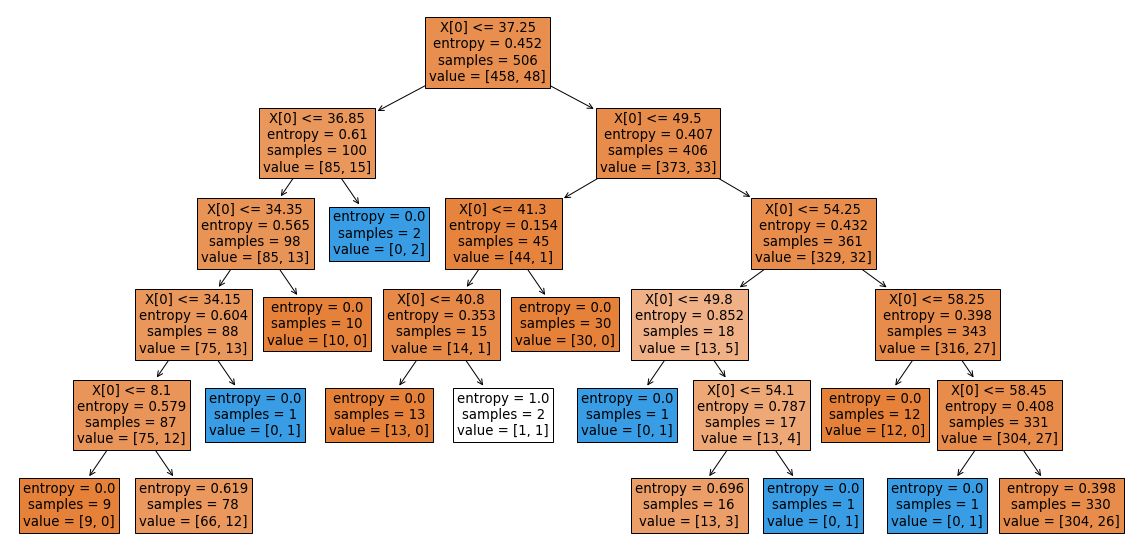

In [12]:
#7
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
df_boston_age = df_boston.loc[:, ['AGE']]
target_var = df_boston.iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(df_boston_age,target_var)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True)
plt.show()

# The best split here is 37.25, which is different from what I calculated 37.3
# Now adjust my output to get the same value
def calcentropy_split_mean(col_name):
    length_col = len(df_boston[col_name])
    entropy_list_m = [] 
    mean_unique_list = []
    unique_values = np.sort(df_boston[col_name].unique())
    n = len(unique_values)
    for i, value in enumerate(unique_values):
        next_value = unique_values[min(i + 1, n - 1)]
        # calculate mean of the current value and the next value
        mean_unique = (value + next_value) / 2
        # add the mean_unique to the mean unique list
        mean_unique_list.append(mean_unique)
    
    #calculate the counts of each output category given the mean unique value
    for muni_value in mean_unique_list:
        # calculate combined gini impurity of each branch at each split point
        # count the class numbers in left branch
        output_count_0_left_m,output_count_1_left_m = count_output_class(
        df_boston[df_boston[col_name] < muni_value]['highPriced']
    )
        # count the class numbers in left branch
        output_count_0_right_m,output_count_1_right_m = count_output_class(
        df_boston[df_boston[col_name] >= muni_value]['highPriced']
    )
        # entropy of left branch
        entropy_left_m = calcEntropy(output_count_0_left_m,output_count_1_left_m)
        # entropy of right branch
        entropy_right_m = calcEntropy(output_count_0_right_m,output_count_1_right_m)
        # the proportion of each branch
        left_proportion_m = (df_boston[col_name] < muni_value).sum() / length_col
        right_proportion_m = (df_boston[col_name] >= muni_value).sum() / length_col
        # combined entropy of each split point, add it to the entropy list
        entropy_m = left_proportion_m * entropy_left_m + right_proportion_m * entropy_right_m
        entropy_list_m.append(entropy_m) 
    split_age = mean_unique_list[np.argmin(entropy_list_m)]
    return split_age
     
print("The adjusted best split point using entropy is when AGE  =",calcentropy_split_mean("AGE")) 

# The reason why my first calculation of the best split is 37.3 instead of 37.25 is that I used every unique value 
# to calculate the entropy, however, the DecisionTreeClassifier method calculate the mean of two unique points as 
# an unique value, then use this unique value to calculate the entropy.

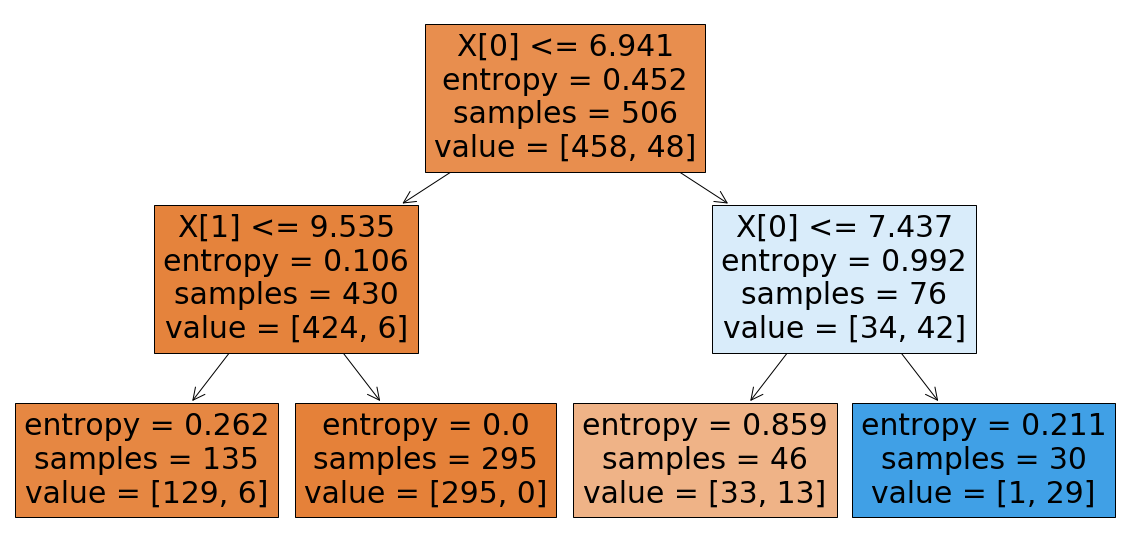

,level,col,threshold
0,1,RM,6.941
1,2,LSTAT,9.535
2,2,RM,7.437


In [8]:
# 8
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
df_boston_variables = df_boston.loc[:, ['RM', 'LSTAT', 'RAD']]
target_var = df_boston.iloc[:,-1]
# Build tree
dt_mulvar = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, max_leaf_nodes = 4
)
dt_mulvar.fit(df_boston_variables, target_var)
# plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_mulvar, filled=True)
plt.show()
# Create a data frame store the results
df_stat_tree = pd.DataFrame({'level': ['1', '2', '2'],
                            'col': ['RM', 'LSTAT' , 'RM'],
                             'threshold': ['6.941', '9.535', '7.437'] }
)
display(df_stat_tree)

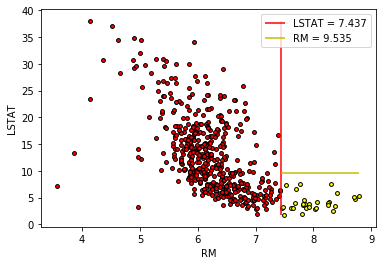

In [9]:
df_boston_variables['pred'] = dt_mulvar.predict(df_boston_variables[['RM','LSTAT','RAD']])

# Plot the decision boundary
plt.vlines(
    x=7.437,
    ymin=df_boston_variables['LSTAT'].min(), 
    ymax=df_boston_variables['LSTAT'].max(),
    label='LSTAT = 7.437',
    color='r'
)
plt.hlines(
    y=9.535,
    xmin=7.437, 
    xmax=df_boston_variables['RM'].max(),
    label='RM = 9.535',
    color='y'
)

plt.legend()
plt.xlabel('RM')
plt.ylabel('LSTAT')

# Plot the points
for i, color in zip(
    [0, 1], # classes
    ['red','yellow'] # colors
):
    df_class = df_boston_variables[df_boston_variables['pred'] == i]
    plt.scatter(x=df_class['RM'], 
                y=df_class['LSTAT'], 
                c=color,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
# From the plot, we can see that in the 2-level decision tree, the second level splits are
# shown as red line and yellow line. The red line is the split point of LSTAT, and the split
# point is LSTAT = 7.437. The yellow line is the split point of RM, and the split point is
# RM = 9.535. We can also see that the plot is reasonable because as expected, all the points
# on the left of the red line are the output class 1 and all the points on the right and below
# the yellow line are the output class 0.

In [10]:
# Part 3
# 10

# test dataset
df_test = df_boston.loc[ :: 5, :]
# training dataset
df_train = pd.merge(
    df_boston, df_test , indicator=True, how='outer'
).query('_merge=="left_only"').drop('_merge', axis=1)
# observations in training data and test data
total_trainob = len(df_train.index)
total_testob = len(df_test.index)
print("Total observations in the training data are" ,total_trainob)
print("Total observations in the test data are" ,total_testob)
# target variable in train data
class_0, class_1 = count_output_class(df_train["highPriced"])
print("The number of 0 class in the training data is:" ,class_0)
print("The number of 1 class in the training data is:" ,class_1)
# target variable in test data
tclass_0, tclass_1 = count_output_class(df_test["highPriced"])
print("The number of 0 class in the test data is:" ,tclass_0)
print("The number of 1 class in the training data is:" ,tclass_1)


Total observations in the training data are 404
Total observations in the test data are 102
The number of 0 class in the training data is: 363
The number of 1 class in the training data is: 41
The number of 0 class in the test data is: 95
The number of 1 class in the training data is: 7


In [11]:
# 11
from sklearn.metrics import *
X_train = df_train.drop(['TARGET', 'highPriced'], axis=1)
y_train = df_train.iloc[:,-1]
X_test = df_test.drop(['TARGET', 'highPriced'], axis=1)
y_test = df_test.iloc[:,-1]
np.random.seed(10086)
# select test prediction data randomly from training data
y_pred_sampled = np.random.choice(y_train, size=len(y_test), replace=True)
# get metrics 
for metric in [
    accuracy_score, precision_score, recall_score, f1_score
]:
    print(f"{metric.__name__}:{metric(y_true=y_test, y_pred=y_pred_sampled)}")
    
# Under this method, we can see that the accuracy of the model is high, however, f1_score is very low.
# Even with high accuracy, it is still not a good prediction model.

accuracy_score:0.8823529411764706
precision_score:0.2222222222222222
recall_score:0.2857142857142857
f1_score:0.25


In [106]:
# 12
X_train_rl = df_train[['RM', 'LSTAT']]
y_train_rl = df_train.iloc[:,-1]
X_test_rl = df_test[['RM', 'LSTAT']]
y_test_rl = df_test.iloc[:,-1]
np.random.seed(10001)
# select test prediction data randomly from training data
y_pred_rl = np.random.choice(y_train_rl, size=len(y_test_rl), replace=True)
# get metrics 
for metric in [
    accuracy_score, precision_score, recall_score, f1_score
]:
    print(f"{metric.__name__}:{metric(y_true=y_test_rl, y_pred=y_pred_rl)}")

# This classifier has very low performance. The accuracy of the classifier is lower than the classifier in 
# last question. Also, f1_score is 0.

accuracy_score:0.7941176470588235
precision_score:0.0
recall_score:0.0
f1_score:0.0


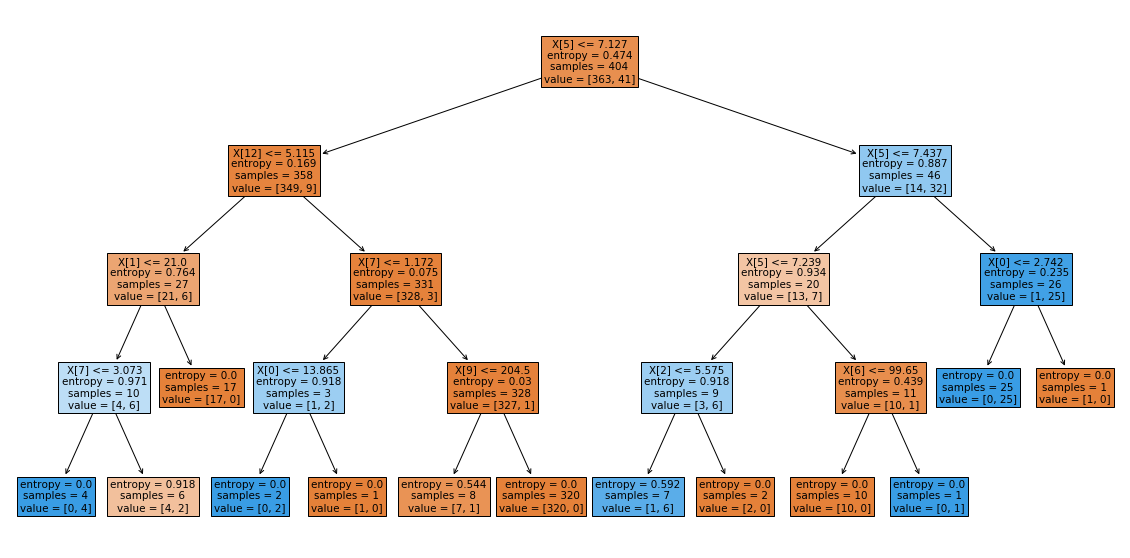

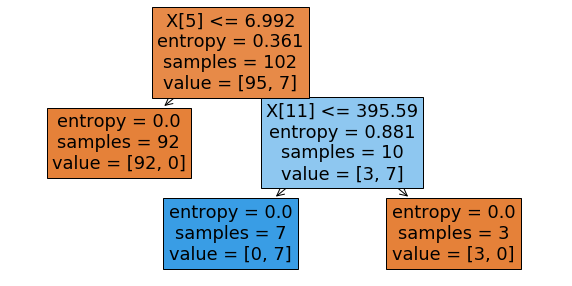

Accuracy: 0.9607843137254902
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.71      0.71      0.71         7

    accuracy                           0.96       102
   macro avg       0.85      0.85      0.85       102
weighted avg       0.96      0.96      0.96       102



In [20]:
# Part 4
# 13
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
# apply tree on training data
X_train = df_train.drop(['TARGET', 'highPriced'], axis=1)
y_train = df_train.iloc[:,-1]
dt_train = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt_train = dt_train.fit(X_train,y_train)
# plot the training tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt_train, filled=True)
plt.show()
# apply training tree on test data
X_test = df_test.drop(['TARGET', 'highPriced'], axis=1)
y_test = df_test.iloc[:,-1]
y_pred = dt_train.predict(X_test)
dt_test = DecisionTreeClassifier(criterion='entropy')
dt_test = dt_test.fit(X_test,y_pred)
# plot the pred tree

plt.figure(figsize=(10,5))
plot_tree(dt_test, filled=True)
plt.show()
# Accuracy of prediction
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print(metrics.classification_report(y_test, y_pred))


# From two plots, we can see that the splits in two plots are at the same location("RM", "AGE" and "B") and 
# the probabilites for each node are the same. The accuracy is 95.09803921568627%. In addition,
# f1_score of 0 is 0.98, and f1_score of 0 is 0.71, which is low. Compared to the baseline and the tree I built in 
# question 11, clearly, the formance of this classifier is way higher.




In [61]:
# 14

from sklearn.ensemble import BaggingClassifier
from sklearn import tree
X_train = df_train.drop(['TARGET', 'highPriced'], axis=1)
y_train = df_train.iloc[:,-1]
X_test = df_test.drop(['TARGET', 'highPriced'], axis=1)
y_test = df_test.iloc[:,-1]
# build bagging classifier
bagging_model=BaggingClassifier(n_estimators=100, bootstrap=True)
bagging_model=bagging_model.fit(X_train,y_train)
y_test_pred=bagging_model.predict(X_test)
# calculate accuracy
accuracy_bagging =  metrics.accuracy_score(y_test, y_test_pred)
print("The accuracy of bagging model is:",accuracy_bagging)
print(metrics.classification_report(y_test, y_test_pred))

# From the result, we can see that the performance of bagging classifier is highly improved compared
# to the classifier I built in question#13 , the accuracy is improved to 98.03% with bagging method.
# In addition, f1_score of 0 is 0.99, and f1_score of 0 is 0.83. The performance of this tree is better
# than the tree in question13.

# Bagging method is used to reduce variance of the decision tree. The bagging method chooses data randomly
# from training data with replacement to form several subsets. Then uses each subset to train the classfier 
# the using the average results of all the training subset as the final model. However, in question 13, 
# the mothods just uses the whole training data to train, there is no way to reduce the variance. So the 
# accuracy is lower.



The accuracy of bagging model is: 0.9803921568627451
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       1.00      0.71      0.83         7

    accuracy                           0.98       102
   macro avg       0.99      0.86      0.91       102
weighted avg       0.98      0.98      0.98       102



In [102]:
# 15
from sklearn.ensemble import RandomForestClassifier
X_train = df_train.drop(['TARGET', 'highPriced'], axis=1)
y_train = df_train.iloc[:,-1]
X_test = df_test.drop(['TARGET', 'highPriced'], axis=1)
y_test = df_test.iloc[:,-1]
# build random forest classifier
np.random.seed(111)
clf_rf = RandomForestClassifier(bootstrap = True,n_estimators=100,criterion='entropy')
clf_rf.fit(X_train,y_train)
y_test_predrf=clf_rf.predict(X_test)
# calculate accuracy
accuracy_rf = metrics.accuracy_score(y_test, y_test_predrf)
print("The accuracy of random forest model is:",accuracy_rf)
print(metrics.classification_report(y_test, y_test_predrf))

# From the result, we can see that the accuracy of random forest model is 97.05882352941176%, which 
# is higher than the accuracy of decision tree in question13 but lower than accuracy of decision tree
# using bagging in question 14.In addition, f1_score of 0 is 0.98, and f1_score of 0 is 0.77. So the performance
# of this decision tree is lower than the random forest decision tree.


The accuracy of random forest model is: 0.9705882352941176
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.83      0.71      0.77         7

    accuracy                           0.97       102
   macro avg       0.91      0.85      0.88       102
weighted avg       0.97      0.97      0.97       102

